<a href="https://colab.research.google.com/github/rogacky11/WineQT_neural_network/blob/main/WineQT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import seaborn as sns
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import models, layers
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('WineQT.csv')

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
def map_quality(value):
    return value - 3

In [ ]:
df['quality'] = df['quality'].map(map_quality)

In [ ]:
X = df.drop('quality', axis = 1)
y = df['quality']
X = X.values
y = y.values

In [ ]:
df['quality'].value_counts()

2    483
3    462
4    143
1     33
5     16
0      6
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tosplit, x_test, y_train_tosplit, y_test = train_test_split(X, y, test_size=.2, shuffle=True,  random_state=50)
x_train, x_val, y_train, y_val = train_test_split(x_train_tosplit, y_train_tosplit, test_size=.2, shuffle=True,  random_state=50)

In [ ]:
X.shape

(1143, 11)

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
x_train

array([[ 7.6  ,  0.41 ,  0.14 , ...,  3.32 ,  0.57 , 10.5  ],
       [ 6.1  ,  0.58 ,  0.23 , ...,  3.46 ,  0.65 , 12.5  ],
       [ 6.8  ,  0.65 ,  0.02 , ...,  3.35 ,  0.62 , 10.4  ],
       ...,
       [ 8.1  ,  0.545,  0.18 , ...,  3.3  ,  0.59 ,  9.   ],
       [ 7.4  ,  0.36 ,  0.3  , ...,  3.24 ,  0.7  , 11.4  ],
       [ 6.7  ,  0.75 ,  0.12 , ...,  3.38 ,  0.52 , 10.1  ]])

In [ ]:
one_hot_train_y = to_categorical(y_train)
one_hot_test_y = to_categorical(y_test)
print(one_hot_train_y[1])

one_hot_val_y = to_categorical(y_val)
print(one_hot_val_y[1])

[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]


In [ ]:
# from keras.callbacks import EarlyStopping, LearningRateScheduler

# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=20,
#                                restore_best_weights=True,
#                                mode='min',
#                               )

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'sigmoid', input_shape = (11,)))
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dense(128, activation = 'sigmoid'))
model.add(layers.Dense(6, activation = 'softmax'))
#funkcje nadzorująca od 1 do 3 warstw

In [ ]:
model.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, one_hot_train_y, epochs = 1000,  validation_data=(x_val, one_hot_val_y),  batch_size = 90, callbacks = [early_stopping])

In [ ]:
y_test

array([3, 3, 2, 3, 0, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 2, 3, 2, 1, 1, 4, 3,
       2, 3, 3, 2, 2, 3, 3, 4, 2, 3, 4, 2, 4, 4, 2, 3, 4, 2, 2, 2, 4, 3,
       2, 3, 3, 3, 2, 2, 2, 4, 3, 4, 2, 4, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 2, 2, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 2, 4, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 3, 2, 5, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 3, 4, 2, 2, 4, 4, 2, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 1, 2, 3, 3, 4, 1, 3, 3, 2, 3, 4, 1, 2, 4, 3, 2, 2, 2, 4,
       2, 1, 2, 2, 3, 2, 3, 4, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 4,
       2, 2, 3, 4, 4, 3, 2, 4, 4, 1, 4, 1, 1, 4, 4, 4, 3, 2, 2, 3, 2, 2,
       3, 4, 2, 2, 3, 2, 4, 0, 3])

In [ ]:
result = model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
pred = np.argmax(result, axis = 1)
print(pred)

[3 3 2 2 2 3 2 2 3 2 3 3 3 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 3 2 2 3 2 4 3 2
 2 3 2 2 2 3 3 3 3 2 2 3 2 3 4 3 3 2 3 2 2 3 3 3 2 2 2 3 3 3 2 2 3 2 2 3 4
 2 2 2 3 4 2 3 3 2 2 3 2 2 3 3 2 3 2 3 2 3 3 3 3 2 3 2 2 2 3 2 3 2 3 3 3 3
 2 2 2 2 3 2 3 2 2 3 3 3 2 2 2 2 2 2 3 2 2 3 2 2 3 2 3 3 2 4 2 2 3 3 2 2 3
 3 2 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 3 4 3 2 3 3 2 2 2 3 2 3 2 2 3 2 3 3 2
 4 3 3 2 2 2 2 3 3 3 2 3 3 2 3 2 3 3 2 2 3 3 3 3 2 2 3 3 4 2 2 2 3 2 2 2 2
 2 2 2 2 3 2 3]


In [ ]:
proc = pred[pred==y_test]
print(len(proc)/len(y_test))

0.5633187772925764


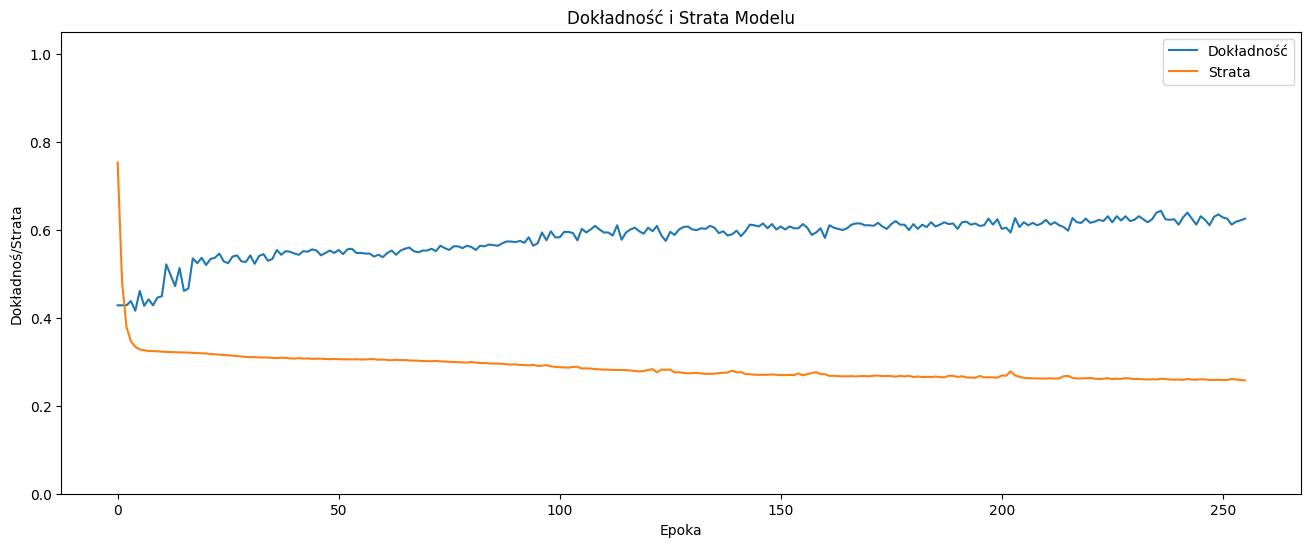

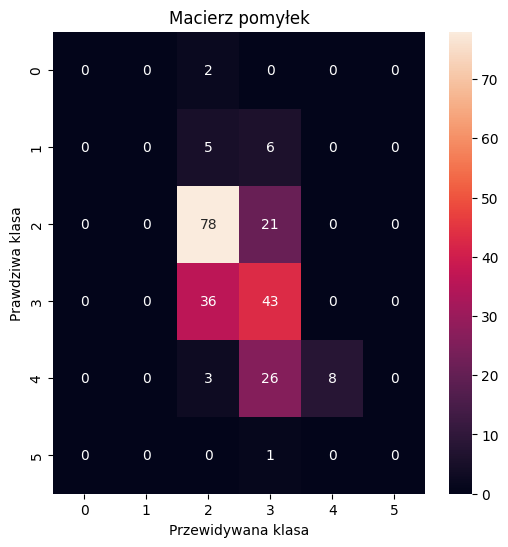

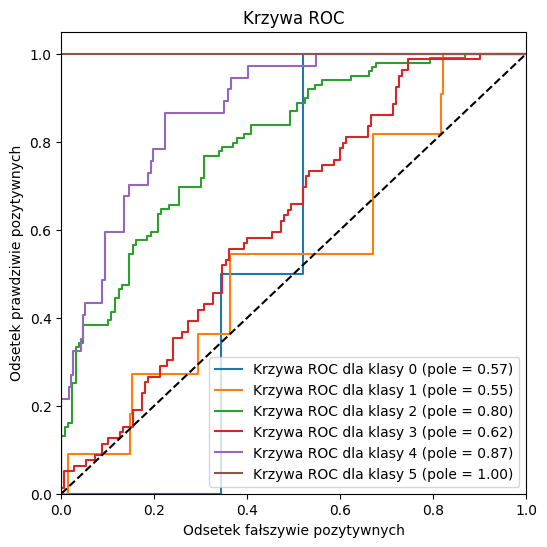

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

plt.figure(figsize=(16, 6))

# Wykres historii dokładności i straty
plt.plot(history.history['acc'], label='Dokładność')
plt.title('Dokładność i Strata Modelu')
plt.ylabel('Dokładnoś/Strata')
plt.xlabel('Epoka')
plt.ylim([0.0, 1.05])
plt.plot(history.history['loss'], label='Strata')

plt.legend()
plt.show()

# Macierz pomyłek
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Macierz pomyłek')
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidywana klasa')
plt.show()

# Krzywa ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(one_hot_test_y[:, i], result[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Wykres wszystkich krzywych ROC
plt.figure(figsize=(6, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='Krzywa ROC dla klasy {0} (pole = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from itertools import product

# def best_network_config(x_train, y_train, x_test, y_test, layers_range, neurons_range, epochs=10, batch_size=32):
#     best_accuracy = 0.0
#     best_config = None
#     accuracy_data = []

#     for num_layers in range(layers_range[0], layers_range[1] + 1):
#         layer_data = []

#         for neurons_list in product(range(neurons_range[0], neurons_range[1] + 1), repeat=num_layers):
#             print("Training model with {} layers and neurons per layer: {}...".format(num_layers,neurons_list))

#             # Model
#             model = models.Sequential()
#             model.add(layers.Dense(neurons_list[0], activation='relu', input_shape=(11,)))
#             for neurons in neurons_list[1:]:
#                 model.add(layers.Dense(neurons, activation='relu'))
#             model.add(layers.Dense(6, activation='sigmoid'))

#             # Kompilacja
#             model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#             history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#             # Test
#             loss, accuracy = model.evaluate(x_test, y_test)
#             print("Test accuracy for {} layers and neurons per layer {}: {}\n".format(num_layers,neurons_list,accuracy))

#             # Zapis
#             layer_data.append((neurons_list, accuracy))

#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_config = (num_layers, neurons_list)

#         accuracy_data.append(layer_data)

#     print("Best configuration found: {} with accuracy: {}".format(best_config, best_accuracy))
#     return best_config, best_accuracy, accuracy_data


In [ ]:
# layers_range = (1, 1)
# neurons_range = (8, 128)

# best_config, best_accuracy, accuracy_data = best_network_config(x_train, one_hot_train_y, x_test, one_hot_test_y, layers_range, neurons_range)

NameError: name 'x_train' is not defined